# Análise exploratoria de Dados - Doenças cardiovasculares

Por Marcos Antonio - `https://www.linkedin.com/in/marcos-antonio-adm`

<img src="https://raw.githubusercontent.com/MarcosBarto/Dadosqueimadas/master/Doen%C3%A7acardio.jpg" 
style="max-heigth:100%" style="max-width:100%">

[![author](https://img.shields.io/badge/author-Marcos.A-blue.svg)](https://www.linkedin.com/in/marcos-antonio-adm) [![](https://img.shields.io/badge/python-3.5+-blue.svg)](https://www.python.org/downloads/release/python-365/) [![GPLv3 license](https://img.shields.io/badge/License-GPLv3-blue.svg)](http://perso.crans.org/besson/LICENSE.html)


Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no `lifestyle`,tais:
como alimentação regulares, exercícios fisicos regulares, controle de estress.

Existem hoje várias pesquisas na área de `Machine Learning` visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista na revista Nature Biomedical Engineering mostram que algoritmos de Deep Learning foram capazes de antecipar doenças cardíacas em até 5 anos.

### 🧡 As doenças do coração mais comuns são:                
* Hipertensão                                                                               
* Enfarte agudo do miocárdio
* Angina de peito
* Doenças nas válvulas cardíacas
* Doenças cardíacas congénitas
* Endocardite
* Arritmias cardíacas
* Miocardite
* Tumores no coração

### 💀 Principais fatores de riscos

* Sedentarismo
* Tabagismo
* Stress
* Obesidade
* Hipertensão
* Diabetes
* Colesterol elevado (Dislipidémia)


## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/MarcosBarto/Dadosqueimadas/master/aleksandr.kuskov.sc.a.01.final.2016.3.000.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).


## Objetivo do estudo de Dados

* Mostrar em gráfico e tabelas, dados relacionados a doença cardiovascular
* Fazer correlação entre as informações do Dataset de forma de gerar analises 
* Fazer introdução do material com ponto de ingnição para `Machine Learning` 

### Identificação e descrição das colunas que compõem o dataset


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

## Importar os Dados

Importaremos os dois *datasets* 

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [2]:
# Importa as biblioteca necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# Importar dataset da UCI
df =pd.read_csv(dataset_uci)

# Importa dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)



### Modificações necessária para atender a análise

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [2]:
#Colunas dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [3]:
# Variável alvos antes
df.num.value_counts()


0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [4]:
# Converte valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [5]:
# Variavel alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [6]:
# Ver o tamanho do dataset UCI: 303 linhas e 14 colunas ao total
df.shape


(303, 14)

In [25]:
# Ver describe analisado desvio patrão, media, mediana, max, minimo ...  do dataset UCI
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [26]:
# Ve os tipos de variável do dataset
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [7]:
# Verificar as 5 primeiras entrada do dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [41]:
# Verificar valores ausentes nas colunas do dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
# Analisar na coluna 'num' quantidade de pessoas com a doença(1) e quantas pessoas não tem doenças(0)
print("0 - Não há doença cardiaca :\t{}".format(df.num.value_counts()[0]))
print("1 - Ha doença cardiaca :\t{}".format(df.num.value_counts()[1]))



0 - Não há doença cardiaca :	164
1 - Ha doença cardiaca :	139


Relação entre variavel `num` e `sex`

In [10]:
# Quantidade por genero no dataset
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

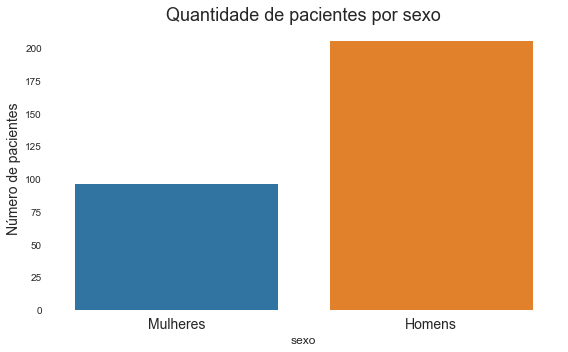

In [28]:
# Verificando quantidade de homem e mulheres no dataset
fig, ax=plt.subplots(figsize=(8,5))

sns.countplot(df["sex"])
ax.set_title('Quantidade de pacientes por sexo', fontsize=18)
ax.set_xticklabels(["Mulheres", "Homens"], fontsize=14)
ax.set_xlabel('sexo', fontsize=12)
ax.set_ylabel('Número de pacientes', fontsize=14)
plt.tight_layout()


### Análise entre a idade e o indice de colesterol
Abaixo notasse que a idade é fator agravante, o colesterol sérico é o colesterol que está na corrente sanguínea. Ter níveis de colesterol elevado, especialmente níveis elevados de LDL, contribui para o estreitamento e endurecimento das artérias.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


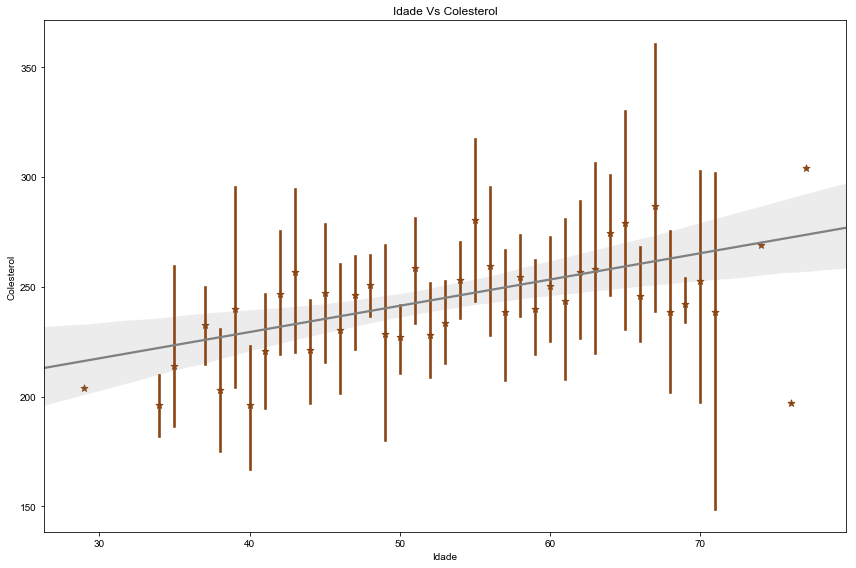

In [4]:
fig, ax=plt.subplots(figsize=(12,8))
sns.regplot(x='age', y='chol', data=df, ax=ax, marker="*", scatter_kws={"color": "saddlebrown"} ,line_kws={"color":"grey"},x_estimator=np.mean)
sns.set_style("darkgrid", {"axes.facecolor":"10"})
ax.set_title("Idade Vs Colesterol")
ax.set_xlabel("Idade")
plt.grid(False)
ax.set_ylabel("Colesterol")
plt.tight_layout();

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


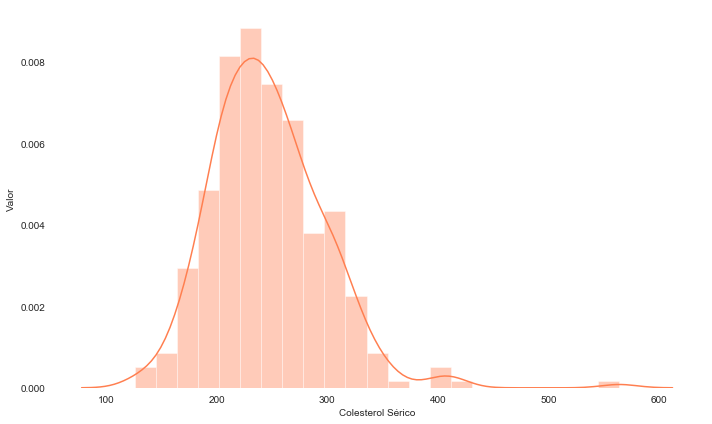

In [7]:
## Análise do colesterol sérico 
fig, ax= plt.subplots(figsize=(10,6))

sns.distplot(df.chol,ax=ax, color='coral')
ax.set_xlabel("Colesterol Sérico")
ax.set_ylabel("Valor")
sns.set_style("darkgrid", {"axes.facecolor":"1.5"})
plt.grid(False)
plt.tight_layout();

### Análise de informações discrepantes
Preciso identificar em estatística, ´outlier´, valor aberrante ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série (que está "fora" dela), ou que é inconsistente.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


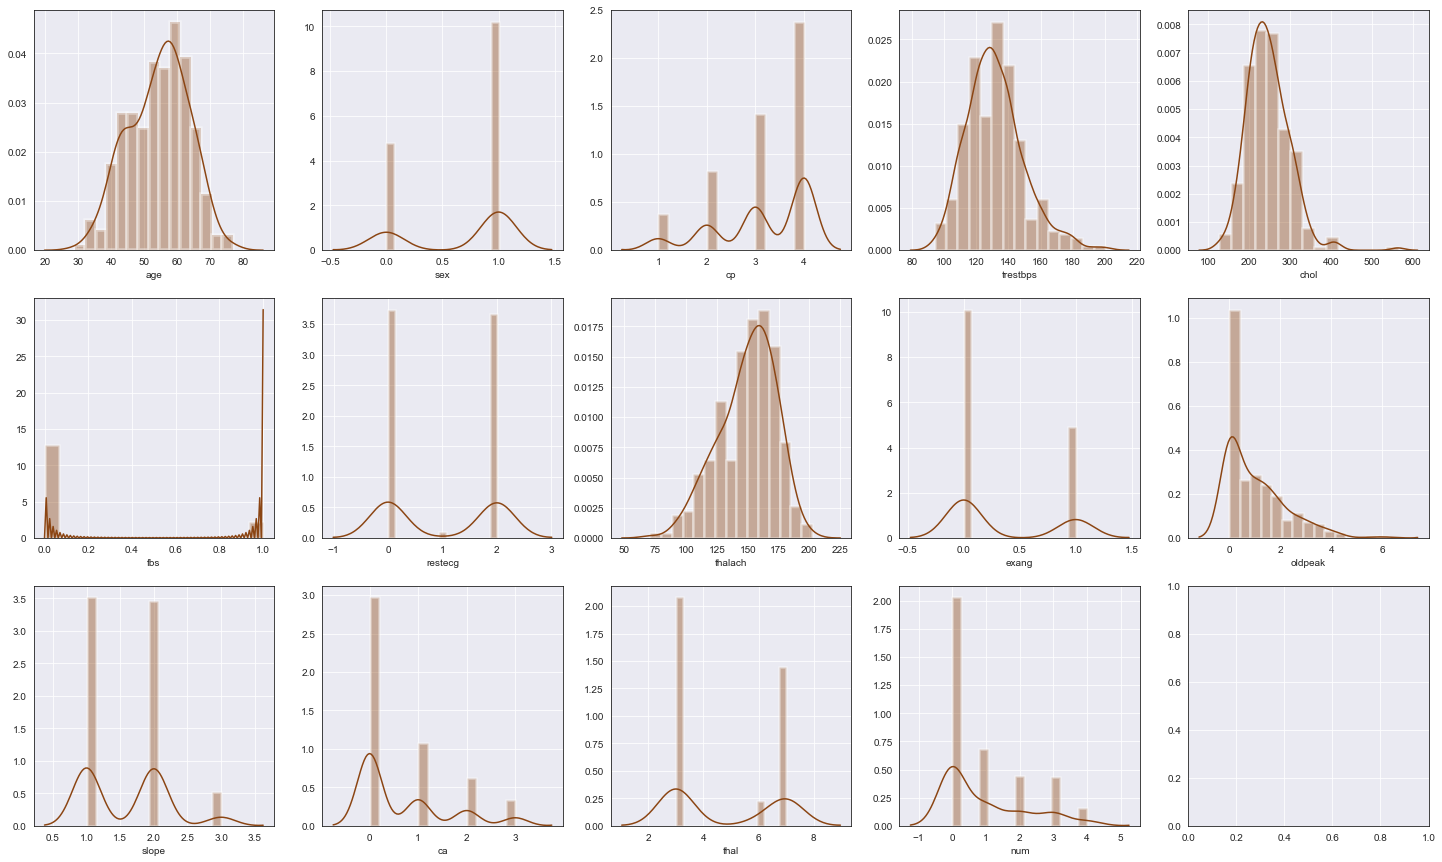

In [15]:
sns.set_style('darkgrid', {'axes.edgecolor': '.09'},)
f, ax= plt.subplots(3,5,figsize=(25,15))
plt.rcParams["patch.force_edgecolor"]= True

vis1 = sns.distplot(df['age'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=3.5,),ax=ax[0][0])
vis2 = sns.distplot(df['sex'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[0][1])
vis3 = sns.distplot(df['cp'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[0][2])
vis4 = sns.distplot(df['trestbps'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[0][3])
vis5 = sns.distplot(df['chol'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[0][4])
vis6 = sns.distplot(df['fbs'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[1][0])
vis7 = sns.distplot(df['restecg'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[1][1])
vis8 = sns.distplot(df['thalach'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[1][2])
vis9 = sns.distplot(df['exang'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[1][3])
vis10 = sns.distplot(df['oldpeak'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[1][4])
vis11 = sns.distplot(df['slope'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[2][0])
vis12 = sns.distplot(df['ca'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[2][1])
vis13 = sns.distplot(df['thal'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[2][2])
vis14 = sns.distplot(df['num'], bins=15,color='saddlebrown', hist_kws=dict(edgecolor="white", linewidth=2.5,),ax=ax[2][3])

### Boxplot
Com os gráficos acima podemos fazer uma analise detalhada, utilizando ´Boxplot´ onde ele mostra visuamente as variações presente nas colunas.

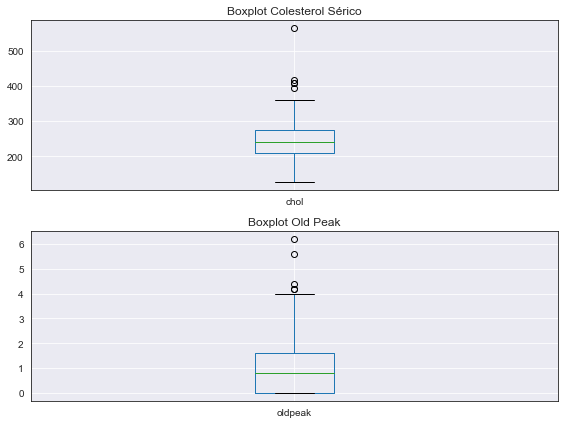

In [37]:
fig, ax=plt.subplots(2,1,figsize=(8,6))
ax[0].set_title("Boxplot Colesterol Sérico")
df.boxplot(["chol"], ax=ax[0])
ax[1].set_title("Boxplot Old Peak")
df.boxplot(["oldpeak"], ax=ax[1])

plt.tight_layout()
                  

### Eletrocardiografia de repouso

Nesse grafico podemos analisar de forma simple a proporção de cada dados

* 0.0 Resultado 151 - Normal
* 2.0 Resultado 148 - Hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* 1.0 Resultado   4 - Anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)



In [22]:
restecg =dict(df.restecg.value_counts())

xticklabels= restecg.keys()
sizes = restecg.values()
explode = (0.1, 0, 0)

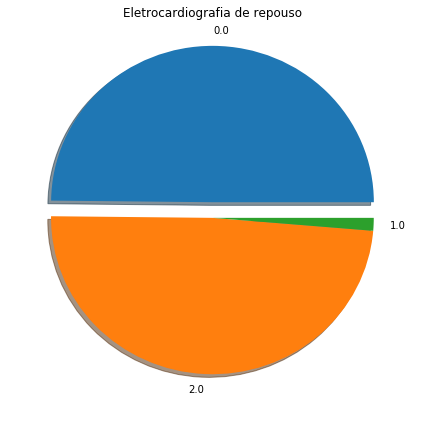

In [25]:
fig, ax=plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels, explode=explode,shadow=True)
ax.set_title("Eletrocardiografia de repouso")
ax.set_xticklabels(["Normal", "hipertrofia ventricular esquerda provável ou definitiva", "anormalidades de ST-T"])
plt.tight_layout()

### Mapa de calor

No gráfico abaixo podemos indetificar as correlações entres os dados.

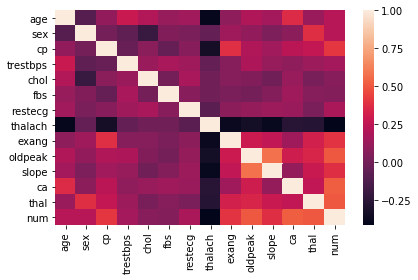

In [26]:
sns.heatmap(df.corr())
plt.tight_layout()

### Dados sobreposto, mostrando suas ligações

* age - idade em anos
* chol - colesterol sérico (mg/dl)
* trestbps - pressão arterial em repouso
* fbs - açucar no sangue em jejum > 120mg/dl
* num - diagnóstico de doença cardíaca (diagnóstico angiográfico)


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

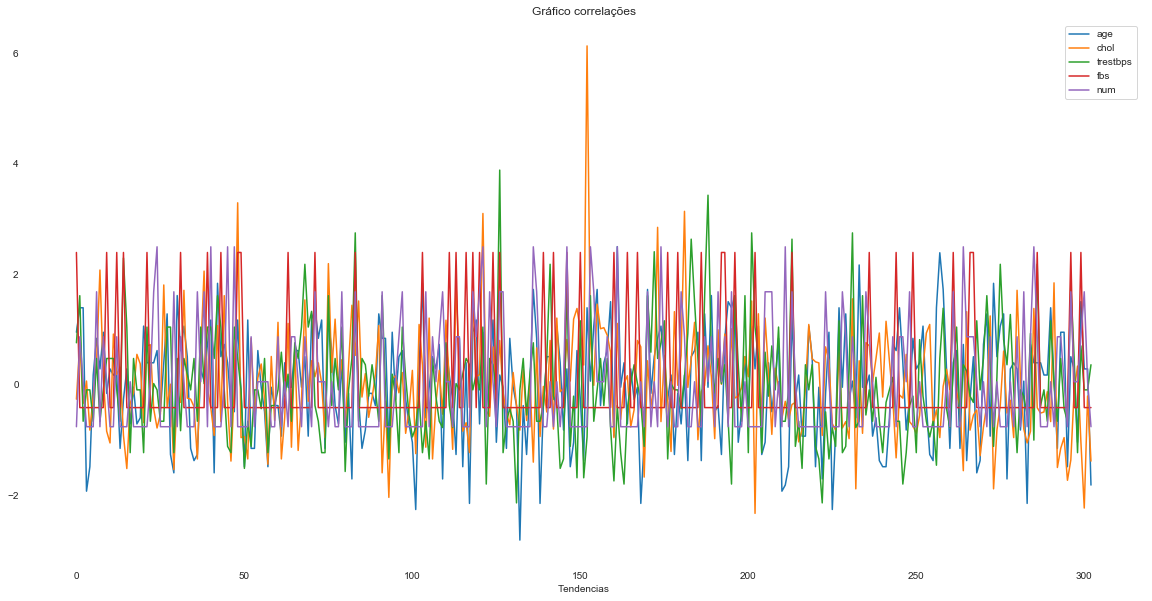

In [40]:
df_norm =(df - df.mean()) / df.std()

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(20,10))

df_norm["age"].plot(kind="line", ax=ax)
df_norm["chol"].plot(kind="line", ax=ax)
df_norm["trestbps"].plot(kind="line", ax=ax)
df_norm["fbs"].plot(kind="line", ax=ax)
df_norm["num"].plot(kind="line", ax=ax)

ax.set_title("Gráfico correlações")
ax.set_xlabel("Tendencias")
ax.legend()
plt.tight_layout

## Cardiômetro - Mortes por doenças cardiovasculares no Brasil

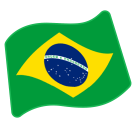


Chegamos aos números de pessoas mortas pelas doenças do coração, onde podemos notar a grande alta no decorrer dos anos. 

Segue algumas informações, recomentadações, aviso, alerta para uma vida melhor e cuidado com o seu 🧡:

* As doenças cardiovasculares matam cerca de 350 mil pessoas a cada ano no Brasil.
* Fumar traz prejuízos não apenas para o fumante, mas para a toda a família.
* A hipertensão arterial é a principal causa de infartos e AVC.
* Para o diabetes, siga a dieta, faça exercícios, controle o peso e use os medicamentos indicados.
* O Infarto do Miocárdio é a primeira causa isolada de mortes no Brasil.
* Alimentos e temperos preparados em casa são mais saudáveis.
* Hereditariedade e sobrepeso são importantes causas de diabetes. Previna-se.
* Evite usar remédios e suplementos sem orientação médica.
* Hipertensão não controlada pode reduzir em mais de uma década a expectativa de vida
* Encare a vida com bom humor. Evite o estresse.
* A fumaça possui cerca de sete mil elementos químicos, muitos deles cancerígenos.
* Antes de usar medicamentos e vitaminas, peça orientação médica.
* Faça exercícios regularmente, pelo menos 3 vezes por semana.
* Não deixe de usar os medicamentos prescritos pelo médico diariamente.

Gráfico mostra a triste realidade do Brasil, vamos nos conscientizar com dicas acimas, para não virar a estatistica abaixo. 

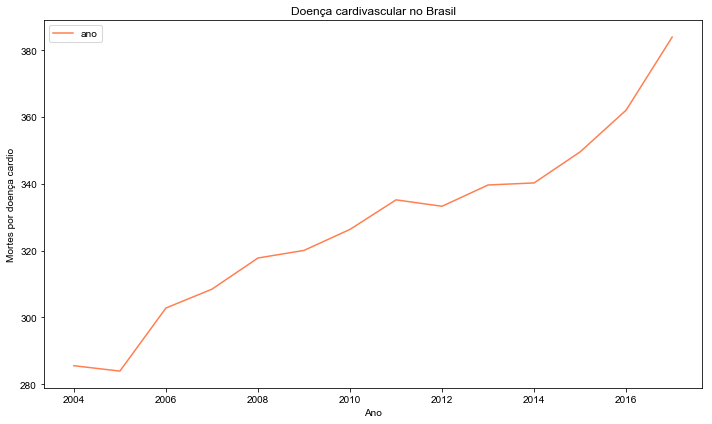

In [27]:

fig, ax=plt.subplots(figsize = (10,6));
sns.lineplot(x="ano", y="mortes_doencas_cardio", data=df_brasil, color='coral', ax=ax, label="ano")
plt.grid(False)
sns.set_style("darkgrid", {"axes.facecolor": "1"})
ax.set_title("Doença cardivascular no Brasil")
ax.set_ylabel("Mortes por doença cardio")
ax.set_xlabel("Ano")
plt.tight_layout();

## Conclusão

Com as informações do Dataset apresentado acima, é possivel verificar o aumentos das doenças do coração, onde em muito caso pode levar a obito do individuo.Espero com essas informações possa incetivar a levar uma vida mais saudavel, ativa, com menos estresse.

Obrigado!